# Import Pakage

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [55]:
df = pd.read_csv('../data/air_quality.csv')
df.head()

,Time,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone
0,2023-01-01T00:00,6.1,3.2,145.0,9.7,0.8,50.0
1,2023-01-01T01:00,5.9,3.2,141.0,10.0,0.9,50.0
2,2023-01-01T02:00,6.0,3.4,134.0,9.4,0.9,53.0
3,2023-01-01T03:00,5.6,3.5,128.0,8.6,0.9,53.0
4,2023-01-01T04:00,5.4,3.6,126.0,7.6,0.9,54.0


In [56]:
df['Time']= pd.to_datetime(df['Time'])
df["Time"]

0      2023-01-01 00:00:00
1      2023-01-01 01:00:00
2      2023-01-01 02:00:00
3      2023-01-01 03:00:00
4      2023-01-01 04:00:00
               ...        
4627   2023-07-12 19:00:00
4628   2023-07-12 20:00:00
4629   2023-07-12 21:00:00
4630   2023-07-12 22:00:00
4631   2023-07-12 23:00:00
Name: Time, Length: 4632, dtype: datetime64[ns]

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4632 entries, 0 to 4631
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Time              4632 non-null   datetime64[ns]
 1   pm10              4632 non-null   float64       
 2   pm2_5             4632 non-null   float64       
 3   carbon_monoxide   4632 non-null   float64       
 4   nitrogen_dioxide  4632 non-null   float64       
 5   sulphur_dioxide   4632 non-null   float64       
 6   ozone             4632 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 253.4 KB


In [58]:
# check for dupplicate data
print(f"jumlah error adalah:\n{df.duplicated().sum()}")
print(f"jumlah error adalah:\n{df.isna().sum()}")

jumlah error adalah:
0
jumlah error adalah:
Time                0
pm10                0
pm2_5               0
carbon_monoxide     0
nitrogen_dioxide    0
sulphur_dioxide     0
ozone               0
dtype: int64


In [59]:
df.tail()

,Time,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone
4627,2023-07-12 19:00:00,5.2,4.1,168.0,2.5,0.7,96.0
4628,2023-07-12 20:00:00,4.7,3.8,150.0,2.7,0.7,86.0
4629,2023-07-12 21:00:00,4.7,3.9,141.0,2.8,0.7,86.0
4630,2023-07-12 22:00:00,5.5,4.0,148.0,3.5,0.9,90.0
4631,2023-07-12 23:00:00,5.2,3.8,144.0,3.6,0.8,89.0


# Exploration Data Analitiy

In [60]:
# we want to split datetime to be Date and Time
df2 = df.copy()
df2.insert(0,"Date",df2['Time'].dt.date)
df2.insert(1,'time_at',df2['Time'].dt.time)
df2.drop("Time",axis=1,inplace=True)

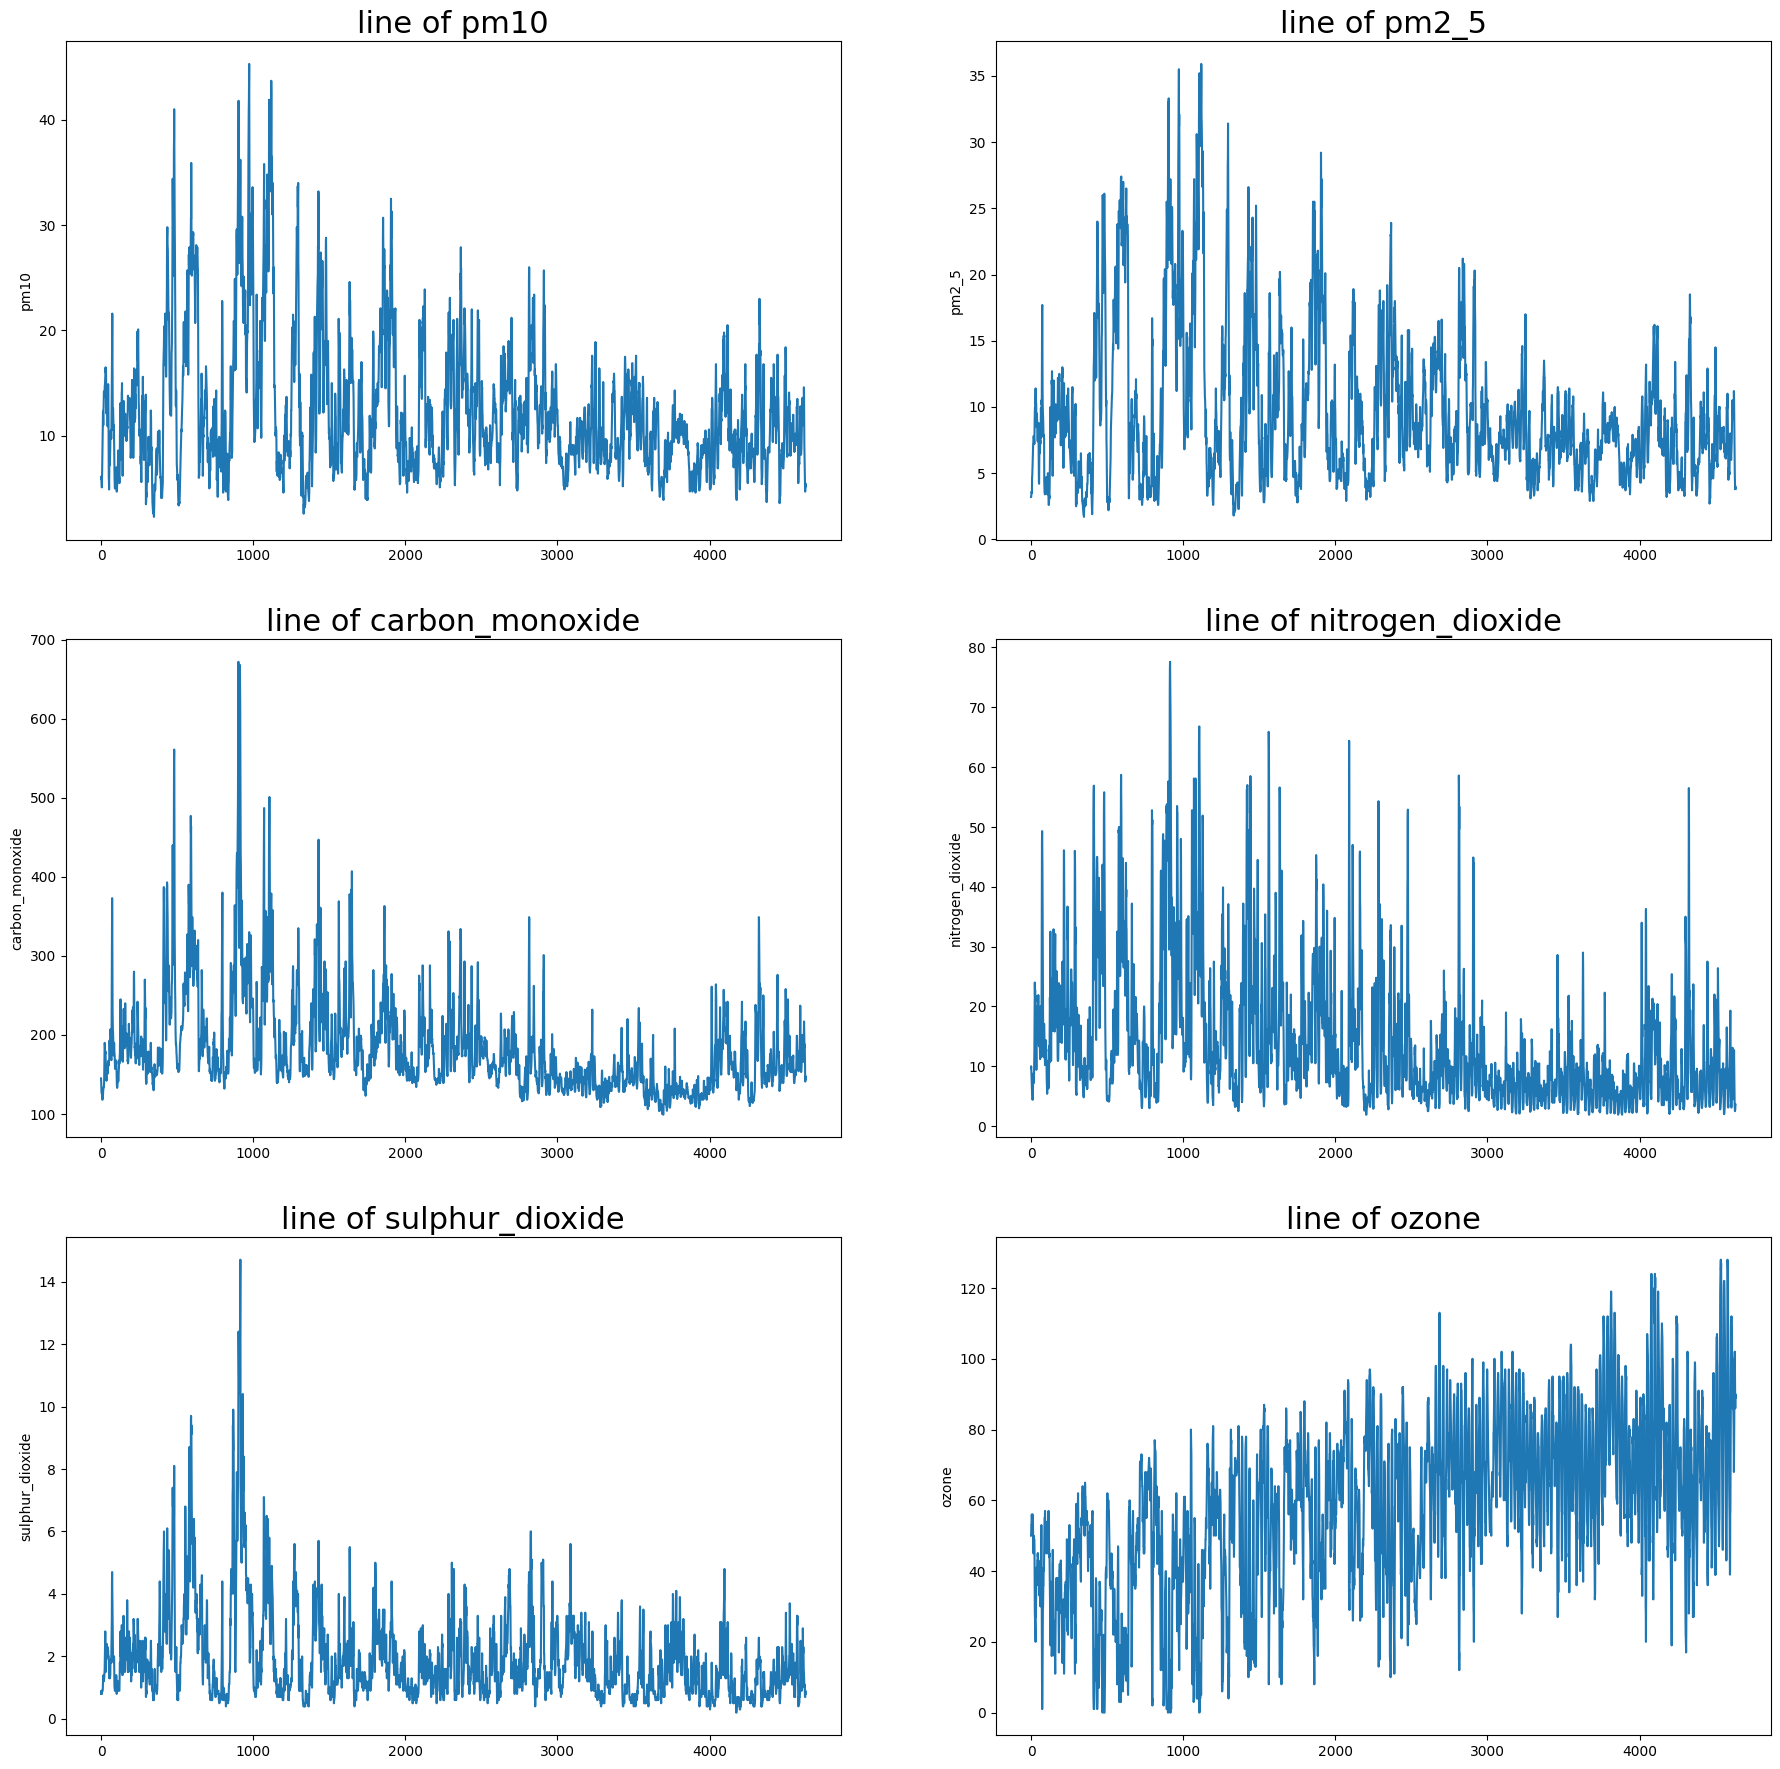

In [62]:
# to see date for pm10
continues_features = df2.drop(["Date","time_at"],axis=1)
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(22, 22))
for i, column in enumerate(continues_features.columns):
    sns.lineplot(continues_features[column],ax=ax[i//2, i%2])
    ax[i//2, i%2].set_title("line of {}".format(column),fontsize=22)


In [ ]:
df2.columns

Index(['Date', 'time_at', 'Time', 'pm10', 'pm2_5', 'carbon_monoxide',
       'nitrogen_dioxide', 'sulphur_dioxide', 'ozone'],
      dtype='object')

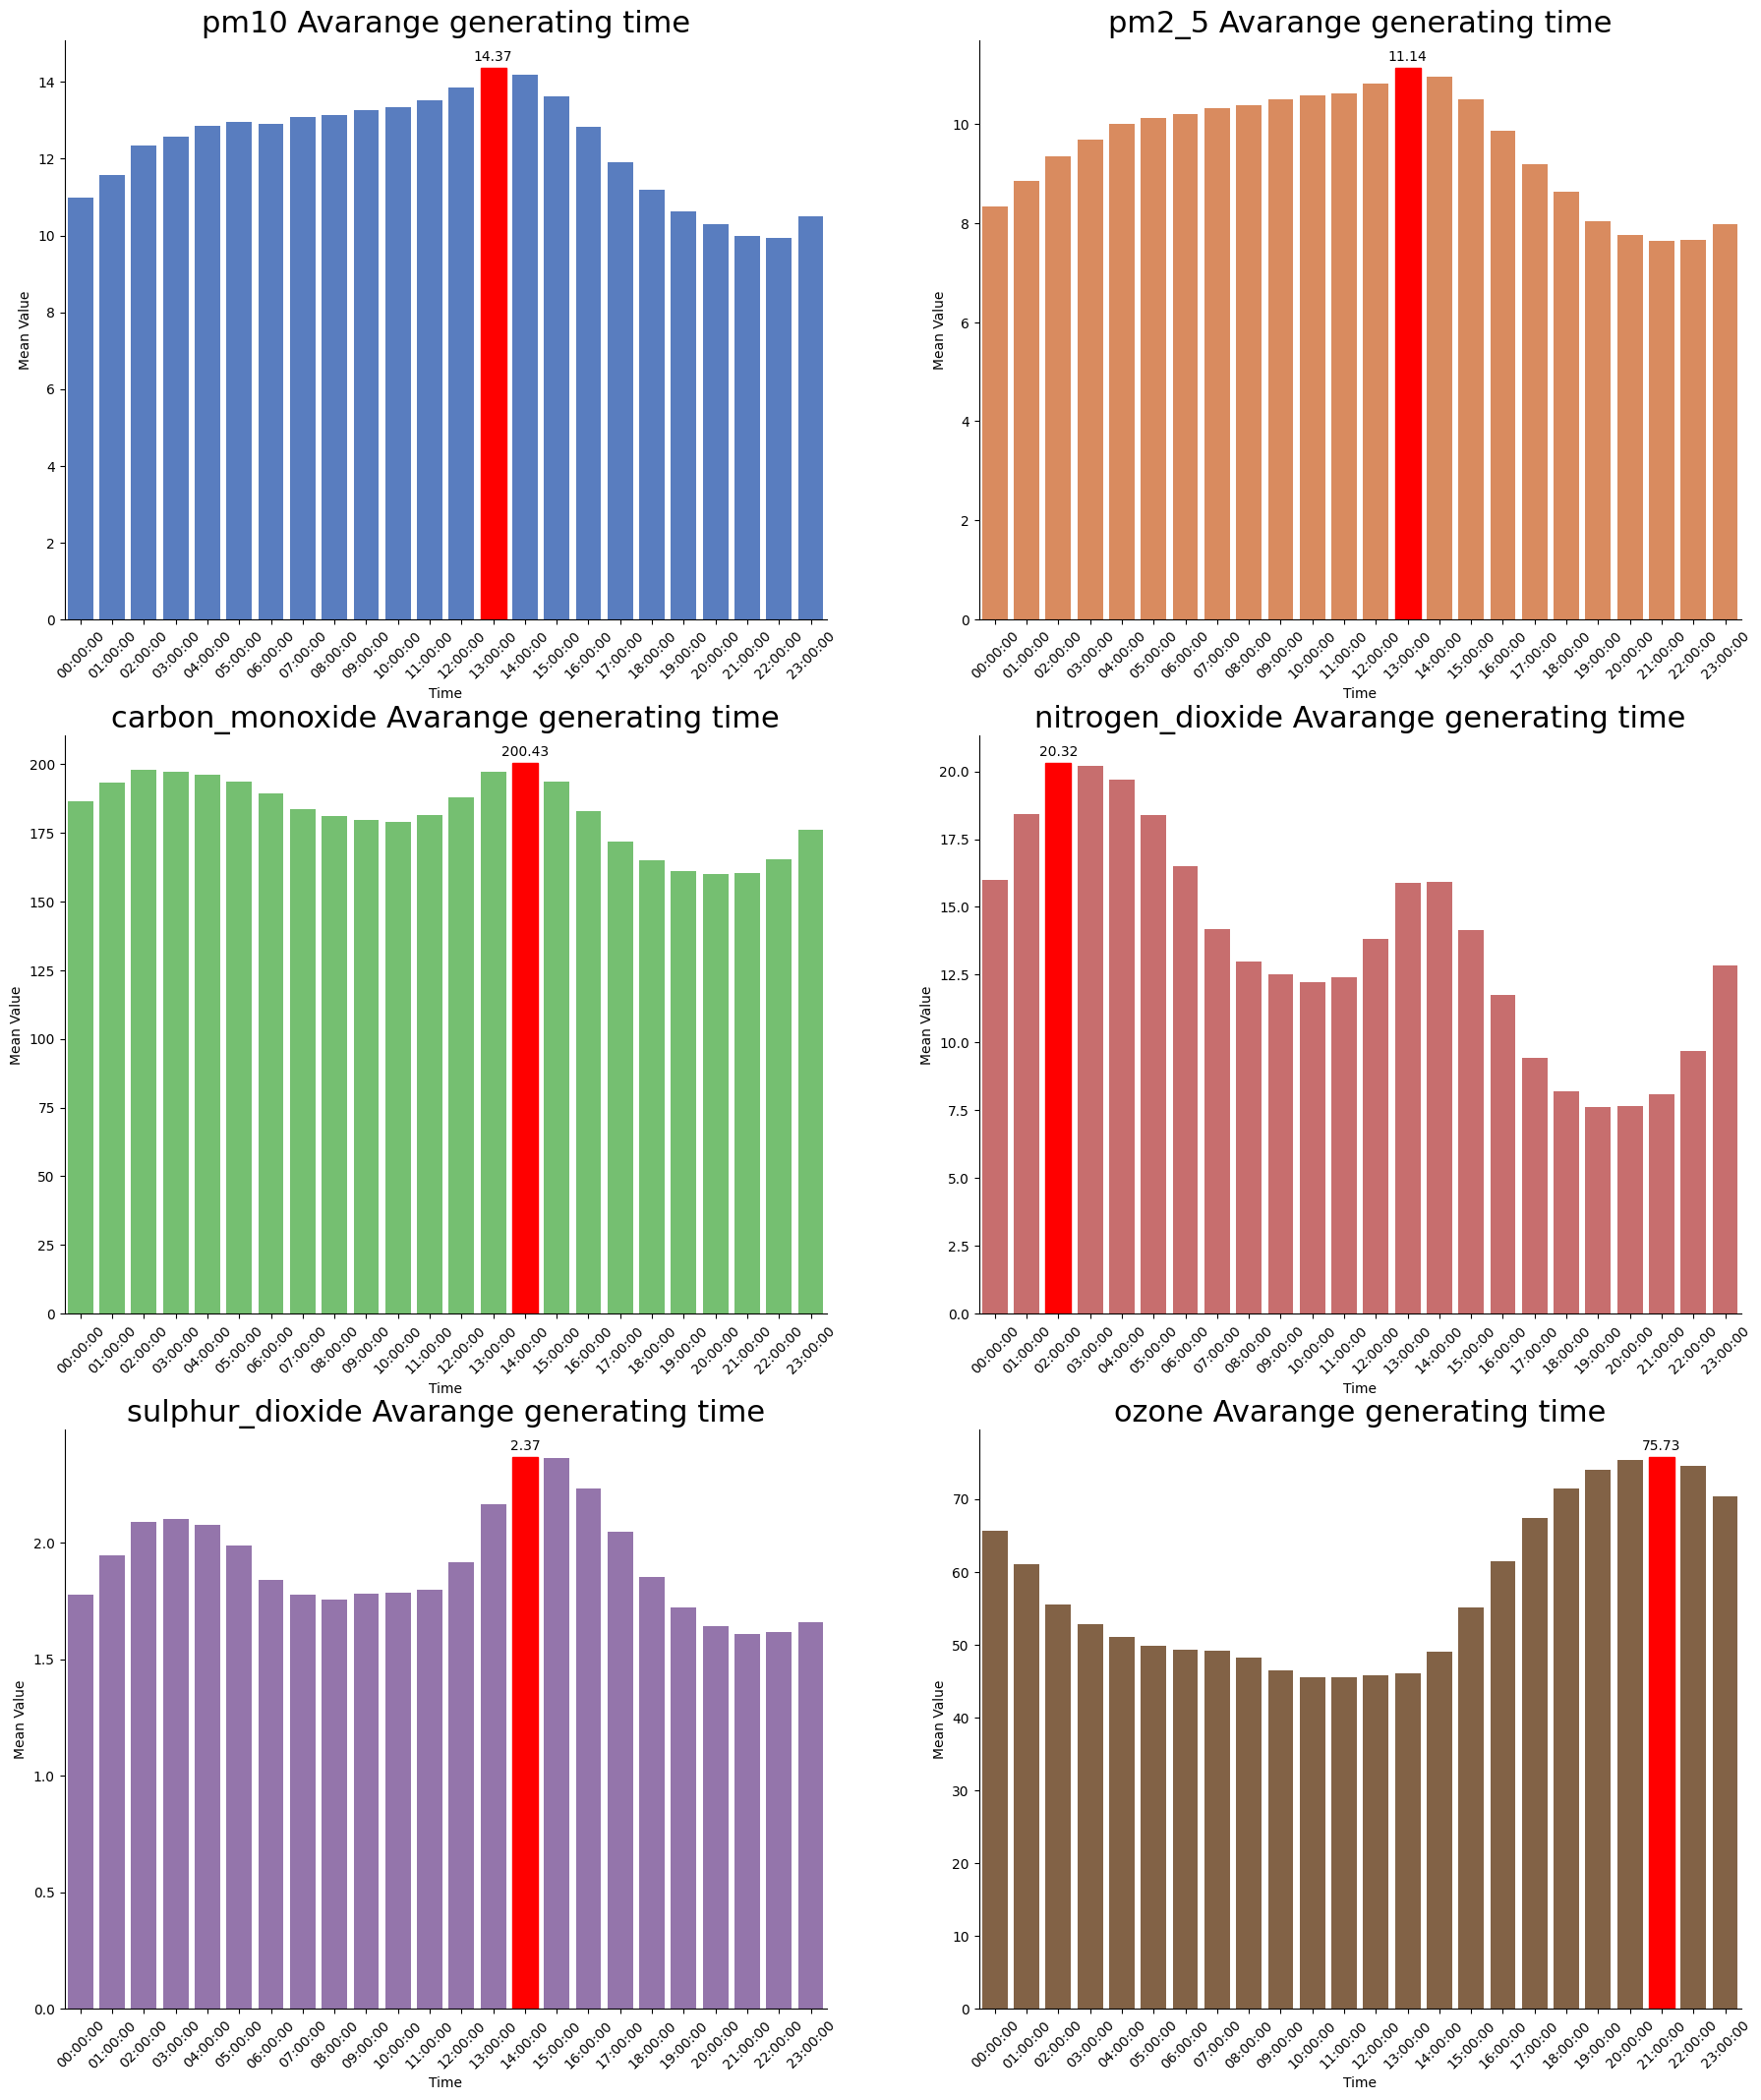

In [87]:
mean_feature = df2.groupby('time_at')[continues_features.columns].mean().reset_index()
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(22, 26))
colors = sns.color_palette("muted")
for i, column in enumerate(continues_features.columns):
    sns.barplot(x='time_at', y=column, data=mean_feature, ax=ax[i//2, i%2], color=colors[i%len(colors)])
    ax[i//2, i%2].set_title("{} Avarange generating time".format(column), fontsize=22)
    ax[i//2, i%2].set_xlabel('Time')
    ax[i//2, i%2].set_ylabel('Mean Value')
    ax[i//2, i%2].spines['top'].set_visible(False)
    ax[i//2, i%2].spines['right'].set_visible(False)
    ax[i//2, i%2].tick_params(axis='x', labelrotation=45)

    # Find maximum value and its index
    max_val = mean_feature[column].max()
    max_idx = mean_feature[mean_feature[column] == max_val]['time_at'].iloc[0]

    # Highlight and annotate the bar with maximum value
    rects = ax[i//2, i%2].containers[0]
    for rect in rects:
        if rect.get_height() == max_val:
            rect.set_color('red')
            ax[i//2, i%2].annotate(f'{max_val:.2f}', xy=(rect.get_x() + rect.get_width() / 2, rect.get_height()), 
                                   xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.show()
